In [1]:
cd /media/sf_datasets/Smarter\ Devices/BLUED_extracted/BLUED-TK

/media/sf_datasets/Smarter Devices/BLUED_extracted/BLUED-TK


In [2]:
import numpy as np
import os
import blued
import pandas as pd
import matplotlib.pyplot as plt
datasets_path=sorted(['../'+f+'/' for f in os.listdir('../') if 'dataset' in f])
print(datasets_path)

['../location_001_dataset_001/', '../location_001_dataset_002/', '../location_001_dataset_003/', '../location_001_dataset_004/', '../location_001_dataset_005/', '../location_001_dataset_006/', '../location_001_dataset_007/', '../location_001_dataset_008/', '../location_001_dataset_009/', '../location_001_dataset_010/', '../location_001_dataset_011/', '../location_001_dataset_012/', '../location_001_dataset_013/', '../location_001_dataset_014/', '../location_001_dataset_015/', '../location_001_dataset_016/']


In [3]:
events = pd.read_csv('event_data.csv',sep = ',',index_col=0,header=0)

In [4]:
events=events.T
events

,0,1,2,3,4,5,6,7,8,9,...,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481
device,111,111,111,111,111,111,111,127,207,127,...,118,111,111,111,111,111,111,111,111,111
time,1408.85,2347.88,5122.77,6035.53,8838.85,9736.73,12555.1,12726.6,12726.6,12746.3,...,598659,599110,601597,602412,604940,605751,608324,609132,611736,612529
phase,A,A,A,A,A,A,A,A,A,A,...,B,A,A,A,A,A,A,A,A,A
file,14,24,52,61,89,99,128,129,129,130,...,6283,6288,6314,6323,6350,6358,6385,6394,6421,6430


In [8]:
eve_dic={'0':'ON','1':'OFF','2':'CHANGE'}

def label_event(x,y):
    q=x
    for i in events.ix[:,x:y]:
        path=blued.get_path(events[i]['file'])
        data = np.loadtxt(path,delimiter=',',skiprows=24)
        data=data[np.where(np.logical_and(data[:,0]>events[i]['time']-0.5,data[:,0]<events[i]['time']+1.0))]
        data=data[:,1] if events[i]['phase']=='A' else data[:,2] 
        peaks = [np.max(data[i:i+200]) for i in range(0,len(data),200)]    
        plt.plot(peaks)
        plt.show()
        events['type'][q]=eve_dic[input()]
        q+=1
    print(events.ix[:,x:y])

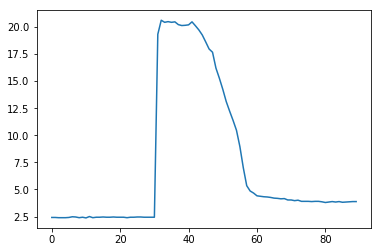

0


KeyError: 'the label [type] is not in the [index]'

In [9]:
label_event(0,2)

In [7]:
events.ix[:,0:5]

,0,1,2,3,4,5
device,111,111,111,111,111,111
time,1408.85,2347.88,5122.77,6035.53,8838.85,9736.73
phase,A,A,A,A,A,A
file,14,24,52,61,89,99


In [12]:
events.loc['type']='UNKNOWN'

In [13]:
events

,0,1,2,3,4,5,6,7,8,9,...,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481
device,111,111,111,111,111,111,111,127,207,127,...,118,111,111,111,111,111,111,111,111,111
time,1408.85,2347.88,5122.77,6035.53,8838.85,9736.73,12555.1,12726.6,12726.6,12746.3,...,598659,599110,601597,602412,604940,605751,608324,609132,611736,612529
phase,A,A,A,A,A,A,A,A,A,A,...,B,A,A,A,A,A,A,A,A,A
file,14,24,52,61,89,99,128,129,129,130,...,6283,6288,6314,6323,6350,6358,6385,6394,6421,6430
type,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN


In [3]:
pwd

'/media/sf_datasets/Smarter Devices/BLUED_extracted/BLUED-TK'

In [6]:
ls

dataset_1/   dataset_13/  dataset_2/  dataset_6/  peaks.csv
dataset_10/  dataset_14/  dataset_3/  dataset_7/  peaks.txt
dataset_11/  dataset_15/  dataset_4/  dataset_8/  peaks_updated.txt
dataset_12/  dataset_16/  dataset_5/  dataset_9/  PQS.csv


In [7]:
cd dataset_16/

/media/sf_datasets/Smarter Devices/BLUED_extracted/BLUED-TK/events/dataset_16


In [8]:
files = os.listdir('../dataset_16/')

In [ ]:
count = 0
period1 = []
for i in files:
    period1.append(i.split('.')[0].split('_')[2])
    period1[count]+='.' + i.split('.')[1]
    count += 1 
period1 = sorted(period1)
for p in period1:
    print (p)
    input()

101737.91699999999

102620.15

104967.01699999999

105829.41699999999

108254.46699999999

109099.30099999999

110234.9

110242.701

110242.96699999999

110636.834

110705.834

110782.451

110911.951

111543.534

112311.084

112383.567

112489.367

112497.4
